In [1]:
from IPython.core.display import HTML
with open ("../style.css", "r") as file:
    css = file.read()
HTML(css)

# Test DFA-2-RegExp

In [2]:
%run DFA-2-RegExp.ipynb

Version 1.0.5


In [3]:
%run FSM-2-Dot.ipynb

In [4]:
%unload_ext nb_mypy

In [5]:
delta = { (0, 'a'): 0,
          (0, 'b'): 1,
          (1, 'a'): 1
        }

In [6]:
A = {0, 1}, {'a', 'b'}, delta, 0, {1}

In [7]:
delta = { (0, 'a'): 1,
          (1, 'b'): 0,
          (1, 'a'): 2
        }

In [8]:
A = {0, 1, 2}, {'a', 'b'}, delta, 0, {2}

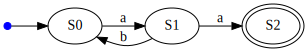

In [9]:
g, _ = dfa2dot(A)
g

In [10]:
r = dfa_2_regexp(A)
r

('+',
 ('+',
  ('+', 0, ('&', ('&', 0, ('*', '𝜀')), '𝜀')),
  ('&',
   ('&',
    ('+', 'a', ('&', ('&', 0, ('*', '𝜀')), 0)),
    ('*', ('+', '𝜀', ('&', ('&', 'a', ('*', '𝜀')), 0)))),
   ('+', 'a', ('&', ('&', 'a', ('*', '𝜀')), '𝜀')))),
 ('&',
  ('&',
   ('+',
    ('+', '𝜀', ('&', ('&', 0, ('*', '𝜀')), 0)),
    ('&',
     ('&',
      ('+', 'a', ('&', ('&', 0, ('*', '𝜀')), 0)),
      ('*', ('+', '𝜀', ('&', ('&', 'a', ('*', '𝜀')), 0)))),
     ('+', 'b', ('&', ('&', 'a', ('*', '𝜀')), 0)))),
   ('*',
    ('+',
     ('+', '𝜀', ('&', ('&', 0, ('*', '𝜀')), 0)),
     ('&',
      ('&',
       ('+', 'a', ('&', ('&', 0, ('*', '𝜀')), 0)),
       ('*', ('+', '𝜀', ('&', ('&', 'a', ('*', '𝜀')), 0)))),
      ('+', 'b', ('&', ('&', 'a', ('*', '𝜀')), 0)))))),
  ('+',
   ('+', 0, ('&', ('&', 0, ('*', '𝜀')), '𝜀')),
   ('&',
    ('&',
     ('+', 'a', ('&', ('&', 0, ('*', '𝜀')), 0)),
     ('*', ('+', '𝜀', ('&', ('&', 'a', ('*', '𝜀')), 0)))),
    ('+', 'a', ('&', ('&', 'a', ('*', '𝜀')), '𝜀'))))))

As this regular expression is nearly unreadable,  The notebook `Rewrite.ipynb` contains the definition of the function `simplify` that can be used to simplify this expression.

In [11]:
%run Rewrite.ipynb

In [12]:
s = simplify(r, Rules)
s

('&', ('&', ('*', ('&', 'a', 'b')), 'a'), 'a')

The function `regexp_2_string` takes a regular expression that is represented as a nested tuple and transforms it into a string.

In [13]:
def regexp_2_string(r):
    if r == 0: 
        return '0'
    if r == '': # epsilon
        return '""'
    if isinstance(r, str): # single characters
        return r
    if r[0] == '&': # concatenation
        r1, r2 = r[1:]
        return regexp_2_string(r1) + regexp_2_string(r2)        
    if r[0] == '+':
        r1, r2 = r[1:]
        return '(' + regexp_2_string(r1) + '+' + regexp_2_string(r2) + ')'
    if r[0] == '*': 
        r1 = r[1]
        if isinstance(r1, str):
            return regexp_2_string(r1) +'*'
        else:
            return '(' + regexp_2_string(r1) + ')*'
    raise Exception(f'{r} is not a suitable regular expression')

In [14]:
print(regexp_2_string(s))

(ab)*aa
